In [21]:
# necessary imports
import cv2
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import keras

from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

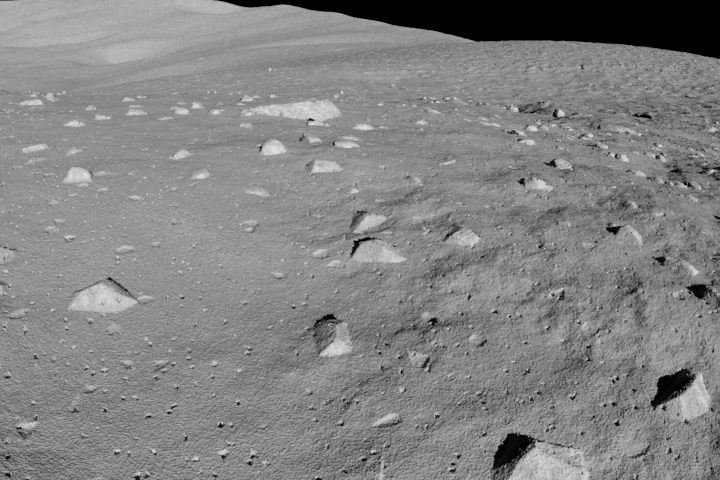

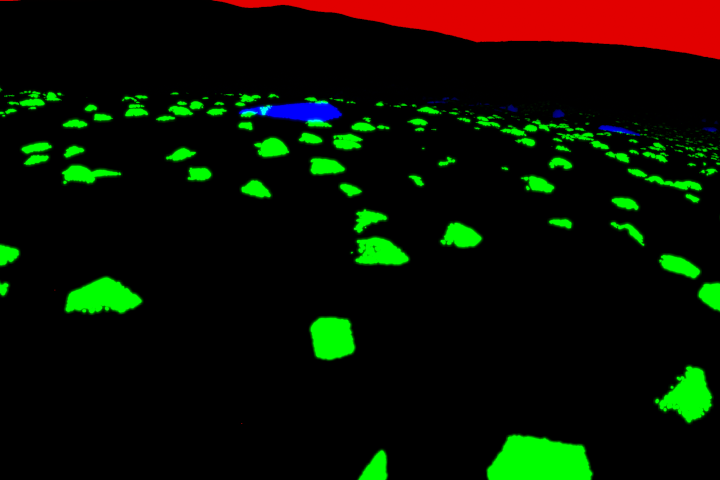

In [49]:
original_image = 'images/render/render0005.png'
ground_truth = 'images/ground/ground0005.png'
#@todo: add also clean mask image for comparison
# apply my own method for every image 

img_original = cv2.imread(original_image)
img_ground = cv2.imread(ground_truth)

img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_ground_rgb = cv2.cvtColor(img_ground, cv2.COLOR_BGR2RGB)


display(Image(filename=original_image))
display(Image(filename=ground_truth))


(480, 720, 1)
[0 1 2 3]


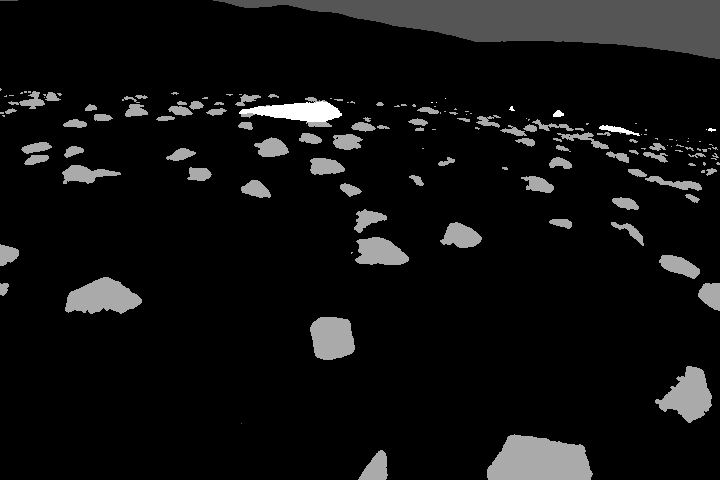

In [216]:
(R, G, B) = cv2.split(img_ground_rgb)

lower = 100
upper = 255

R_ranged = np.clip(cv2.inRange(R, lower, 255), 0, 1) 
G_ranged = np.clip(cv2.inRange(G, lower, 255), 0, 2) 
B_ranged = np.clip(cv2.inRange(B, lower, 255), 0, 3)


merged = cv2.merge([B_ranged, G_ranged, R_ranged])

merged = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)


merged = np.expand_dims(merged, 3)
merged = np.amax(merged, axis=2)

print(merged.shape)
print(np.unique(merged)) 


img = PIL.ImageOps.autocontrast(keras.utils.array_to_img(merged))
display(img)

# plt.imshow(merged[:,:,2])

# display(PIL.ImageOps.autocontrast(keras.utils.array_to_img(img_original_rgb)))


#This makes sense, now map it to class number